<a href="https://colab.research.google.com/github/codjere/belajarIPYNBJere/blob/main/01_Pengenalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tentang Dataset

Dataset ini berisi komentar masyarakat Indonesia di media sosial X mengenai timnas sepak bola Indonesia di era pelatih Shin Tae-yong (STY) yang membawa banyak perubahan bagi sepak bola Indonesia melalui kebijakan-kebijakan yang kontroversial, seperti penggunaan pemain berusia muda hingga banyaknya pemain keturunan yang menjadi Warga Negara Indonesia (WNI).
Langkah-langkah yang diambil pelatih STY menimbulkan berbagai pandangan dari masyarakat, baik itu mendukung keputusan-keputusan yang diambil maupun menolaknya.

referensi [disini](https://www.kaggle.com/datasets/pajarbebek/analisis-sentimen-timnas-sepakbola-di-era-sty)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/sty.csv")

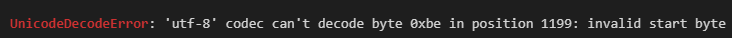


In [ ]:
# bila saat pembacaan dataset mengalami error diatas dapat diatasi dengan code dibawah
# df = pd.read_csv("./data.csv", encoding='ISO-8859-1')

# DEA (Data Explorasi dan Analisis)
Tujuan: Pemahaman data (bentuk data, distribusi, missing values, data duplikat, distribusi label, dan kata-kata yang sering muncul).

### Data Info

In [ ]:
# cek bentuk data
data.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


In [ ]:
# melihat informasi didalam data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   komentar  398 non-null    object
 1   label     398 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [ ]:
# melihat data deskripsi
data.describe()

,komentar,label
count,398,398
unique,393,2
top,"<username> Udahalh juru kunci pasti ni timnas,...",positif
freq,2,204


### Distribusi Label

In [ ]:
# Melihat distribusi persebaran label
data.label.value_counts()

,count
label,
positif,204
negatif,194


In [ ]:
print(f"persentase data positif: {len(data[data['label'] == 'positif'])/len(data)*100:.2f}%")
print(f"persentase data negatif: {len(data[data['label'] == 'negatif'])/len(data)*100:.2f}%")

persentase data positif: 51.26%
persentase data negatif: 48.74%


In [ ]:
# melihat selisih jumlah data
len(data[data['label'] == 'positif']) - len(data[data['label'] == 'negatif'])

10

### Melihat data sampel

In [ ]:
# melihat data text pada index data ke 1
data.komentar[0]

'<username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...'

### Data Missing dan Data Duplikat

In [ ]:
# melihat missing value (data yang hilang) pada kolom komentar
data.komentar.isnull().sum()

np.int64(0)

In [ ]:
data.label.isnull().sum()

np.int64(0)

In [ ]:
# Melihat baris duplikat
duplicate_rows = data[data.duplicated()]
print("Duplicate rows based on all columns:\n", duplicate_rows)

Duplicate rows based on all columns:
                                               komentar    label
85   <username> Udahalh juru kunci pasti ni timnas,...  negatif
88   <username> Dendy sama arhan punya aib nya sty ...  negatif
154  <username> Dengan skuad rasa Eropa" sepertinya...  negatif
350  <username> <username> <username> Klo mnurut gw...  positif


In [ ]:
# menghitung total data duplikat
data.duplicated().sum()

np.int64(4)

In [ ]:
# cek kebenaran duplikasi
data[data['komentar'] == data.komentar[duplicate_rows.index[0]]]

In [ ]:
cek_data = data.komentar[duplicate_rows.index[0]]

In [ ]:
cek_data

In [ ]:
# Harus menghapus duplikasi
data = data.drop_duplicates().reset_index(drop=True)
# atau bisa juga menggunakan kode di bawah ini
# data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()

In [ ]:
# cek kembali data yang tadi duplikat apakah masih ada atau ikut terhapus
data[data['komentar'] == cek_data]

### Kata yang sering muncul

In [ ]:
# melihat distribusi kata sebelum di bersihkan

from collections import Counter
import matplotlib.pyplot as plt

# hitung 10 kata paling sering muncul
words = " ".join(data['komentar']).split()
common = Counter(words).most_common(10)

plt.bar([w[0] for w in common], [w[1] for w in common])
plt.xticks(rotation=45)
plt.title("10 Kata Paling Sering Muncul")
plt.show()


In [ ]:
# lihat distribusi kata setelah di bersihkan
# Menghapus <username> dari kolom 'text'
data['text_clean'] = data['komentar'].str.replace(r'<username>', '', regex=True)

In [ ]:
# cek data setelah pembersihan
data.head()

In [ ]:
words = " ".join(data['text_clean']).split()
common = Counter(words).most_common(10)

plt.bar([w[0] for w in common], [w[1] for w in common])
plt.xticks(rotation=45)
plt.title("10 Kata Paling Sering Muncul")
plt.show()

## Kesimpulan
**DEA** adalah tahap yang lebih exploratory untuk mendapatkan gambaran umum dan menyeluruh mengenai data yang ada, menemukan masalah potensial (misalnya, data hilang atau tidak seimbang), dan menentukan langkah-langkah preprocessing yang diperlukan.

### Tambahan

In [ ]:
!pip install nltk

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

In [ ]:
# Unduh stopwords Bahasa Indonesia jika belum terinstall
nltk.download('stopwords')

In [ ]:
# Daftar stopwords Bahasa Indonesia
stop_words_id = stopwords.words('indonesian')


In [ ]:
# Salah satu tahapan Preprocessing Teks
data['lower'] = data['text_clean'].str.replace(r'[^\w\s]', '', regex=True).str.lower()  # Menghapus tanda baca dan kecilkan huruf

In [ ]:
data.head()

In [ ]:
# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words=stop_words_id)  # Menggunakan stop words Bahasa Indonesia
X = vectorizer.fit_transform(data['lower'])

In [ ]:
# Membuat DataFrame dengan kata dan frekuensinya
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menghitung total frekuensi kata dari seluruh dataset
total_word_freq = word_freq.sum(axis=0).sort_values(ascending=False)

In [ ]:
# Visualisasi dengan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Kata yang Paling Sering Muncul')
plt.show()

In [ ]:
# Menampilkan 10 kata yang paling sering muncul
print("10 Kata yang Paling Sering Muncul:")
print(total_word_freq.head(10))